Student Name: Parham Rezaei
</br>
STDID: 400108547

# P1

In [1]:

from math import sin,sqrt
def lagrange_interpolation(x, y, x0):
    y0 = 0
    for i in range(len(x)):
        p = 1
        for j in range(len(x)):
            if i != j:
                p *= (x0 - x[j]) / (x[i] - x[j])
        y0 += p * y[i]
    return y0

def newton_difference_calculator(x,y):
    n = len(x)
    d0 = x
    d1 = y
    d2 = []
    for i in range(n-1):
        d2.append((d1[i+1]-d1[i])/(d0[i+1]-d0[i]))
    d3 = []
    for i in range(n-2):
        d3.append((d2[i+1]-d2[i])/(d0[i+2]-d0[i]))
    d4 = []
    for i in range(n-3):
        d4.append((d3[i+1]-d3[i])/(d0[i+3]-d0[i]))
    d5 = []
    for i in range(n-4):
        d5.append((d4[i+1]-d4[i])/(d0[i+4]-d0[i]))

    return [d0,d1,d2,d3,d4,d5]

def newton_interpolation(x,y,x0):
    n = len(x)
    diffs = newton_difference_calculator(x,y)
    res = 0
    for i in range(n):
        p = 1
        for j in range(i):
            p *= (x0 - x[j])
        res += p * diffs[i+1][0]
    return res


x = [2,3,5,8,10]
y = [sin(i) + sqrt(1+i) for i in x]
print(f"Part1 \nx = {x}\ny = 1/(1-x) = {y}\nreal value at 6.5: {sin(6.5)+sqrt(1+6.5)}\nlagrange_interpolation(x,y,8) = {lagrange_interpolation(x,y,6.5)}\nnewton_interpolation(x,y,8) = {newton_interpolation(x,y,6.5)}")
print("==================================")
x = [5,7,9,11]
y = [1/(1-i) for i in x]
print(f"Part2 \nx = {x}\ny = 1/(1-x) = {y}\nreal value at 8: {1/(1-8)}\nlagrange_interpolation(x,y,8) = {lagrange_interpolation(x,y,8)}\nnewton_interpolation(x,y,8) = {newton_interpolation(x,y,8)}")
print("==================================")

Part1 
x = [2, 3, 5, 8, 10]
y = 1/(1-x) = [2.6413482343945587, 2.1411200080598674, 1.4905654681200393, 3.989358246623382, 2.77260367946603]
real value at 6.5: 2.953732775613646
lagrange_interpolation(x,y,8) = 2.448243198195968
newton_interpolation(x,y,8) = 2.4482431981959683
Part2 
x = [5, 7, 9, 11]
y = 1/(1-x) = [-0.25, -0.16666666666666666, -0.125, -0.1]
real value at 8: -0.14285714285714285
lagrange_interpolation(x,y,8) = -0.1421875
newton_interpolation(x,y,8) = -0.1421875


# P2

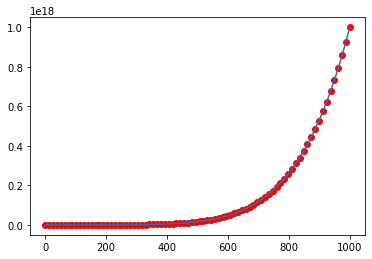

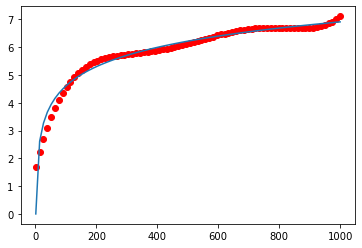

log error: 0.06043482615822719


In [35]:
import numpy as np
from math import sin
import matplotlib.pyplot as plt

def estimate(x,y):
    n = len(x)
    vm = np.vander(x,6, increasing=True)
    vmv = vm.T@vm

    vmv_inv = np.linalg.inv(vmv)

    c = vmv_inv@vm.T @ y
    
    return c

def cal_x(c,x):
        y = 0
        for i in reversed(c):
            y = y * x + i
        return y

f = lambda x: x**6+3*x**2

x = np.linspace(0,1000,80)
y = [f(i) for i in x]
cof = estimate(x,y)
y_generated = np.polyval(np.flip(cof), x)
plt.plot(x,y)
plt.scatter(x, y_generated, label='Sampled points', color='red')
plt.show()
f = lambda x: np.log(x)

x = np.linspace(1,1000,80)
y = [f(i) for i in x]
cof = estimate(x,y)
y_generated = np.polyval(np.flip(cof), x)
plt.plot(x,y)
plt.scatter(x, y_generated, label='Sampled points', color='red')
plt.show()


print(f"log error: {np.mean(np.square(y-y_generated))}")

We observe that it is fitting pretty well

# P3

> Two implementations: one without sympy, and one with sympy

coding from scratch without scympy

In [3]:

from math import sin,cos,factorial,sqrt
import numpy as np

def sin_derivative(x, i):
    sd = 0
    if i%4 == 0:
        sd = sin(x)
    elif i%4 == 1:
        sd = cos(x)
    elif i%4 == 2:
        sd = -sin(x)
    else:
        sd = -cos(x)
    xd = 0
    sign = 1
    if i>=1:
        sign = (-1)**(i-1)
    exp = -(2*i-1)/2
    coeff = 5
    for t in range(2*i-1):
        if t%2 == 1:
            coeff *= t
    coeff /= 2**i
    xd = sign*coeff*x**exp
    if i==0:
        return xd+sd-10
    return xd+sd

def e_derivative(x, i):
    coeff5 = (1/5)**i
    coeff1 = (-1)**i
    return coeff5*np.exp(x/5)+coeff1*np.exp(-x)

def taylor(derv,x, n, base):
    sum = 0
    for i in range(n+1):
        sum += derv(base, i)/factorial(i)*(x-base)**i
    return sum

# PART 1
def p1calculator(i):
    mine = taylor(sin_derivative,10,i,7)
    real = sin(10)+5*sqrt(10)-10
    print(f"PART1 iters: 10, mine: {mine}, real: {real}, error: {abs(mine-real)} which is less than 0.01")
p1calculator(10)

# PART 2
def p2calculator(i):
    mine = taylor(e_derivative,3,i,0)
    real = np.exp(3/5)+np.exp(-3)
    print(f"PART2 iters: 10, mine: {mine}, real: {real}, error: {abs(mine-real)} which is less than 0.01")
p2calculator(10)




PART1 iters: 10, mine: 5.269826831102215, real: 5.2673671899525285, error: 0.0024596411496862203 which is less than 0.01
PART2 iters: 10, mine: 1.8754446931519992, real: 1.8719058687583727, error: 0.0035388243936265162 which is less than 0.01


using sympy

Part 1: 10 iteration, real value: 5.26736718995253, estimated value: 5.26982683110222, error : 0.00245964114968888 which is less than 0.01
Part 2: 10 iteration, real value: 1.87190586875837, estimated value: 1.87544469315200, error : 0.00353882439362696 which is less than 0.01
***********Part 1***********



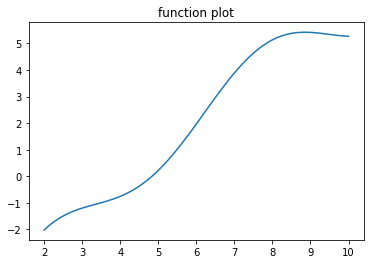

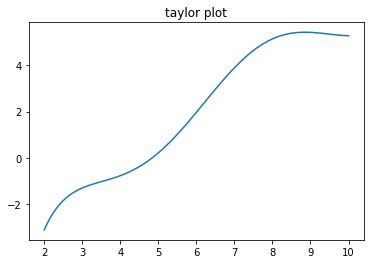

***********Part 2***********



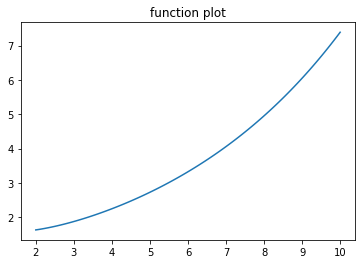

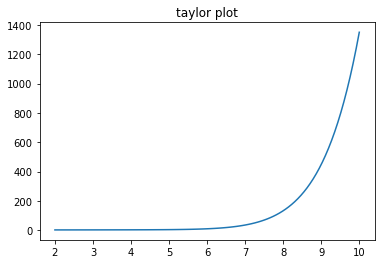

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
# taylor using sympy
x = symbols('x')
p1func = sin(x)+5*sqrt(x)-10
p2func = exp(x/5)+exp(-x)
def taylor(func,x,xeval,base,n):
    sum = 0
    for i in range(n+1):
        sum += diff(func, x, i)/factorial(i)*(xeval-base)**i
    return sum.evalf(subs={x:base})
print(f"Part 1: 10 iteration, real value: {p1func.evalf(subs={x:10})}, estimated value: {taylor(p1func,x,10,7,10)},\
 error : {abs(p1func.evalf(subs={x:10})-taylor(p1func,x,10,7,10))} which is less than 0.01")
print(f"Part 2: 10 iteration, real value: {p2func.evalf(subs={x:3})}, estimated value: {taylor(p2func,x,3,0,10)},\
 error : {abs(p2func.evalf(subs={x:3})-taylor(p2func,x,3,0,10))} which is less than 0.01")

# plots
r = np.linspace(2,10,100)
def fpart1(x):
  return np.sin(x)+5*np.sqrt(x)-10
def fpart2(x):
  return np.exp(x/5)+np.exp(-x)

print("***********Part 1***********\n")
y = [fpart1(i) for i in r]
plt.plot(r,y)
plt.title("function plot")
plt.show()
y = [taylor(p1func,x,i,7,10) for i in r]
plt.plot(r,y)
plt.title("taylor plot")
plt.show()

print("***********Part 2***********\n")
y = [fpart2(i) for i in r]
plt.plot(r,y)
plt.title("function plot")
plt.show()
y = [taylor(p2func,x,i,0,10) for i in r]
plt.plot(r,y)
plt.title("taylor plot")
plt.show()


# P4

In [3]:

from math import sin,cos,factorial
df =[lambda x: cos(x)+4*x-2,lambda x: -sin(x)+4, lambda x: -cos(x), lambda x: sin(x), lambda x: cos(x), lambda x: -sin(x), lambda x: -cos(x), lambda x: sin(x), lambda x: cos(x), lambda x: -sin(x), lambda x: -cos(x)]

def newton(df,x0,tol=1e-5,maxiter=1000):
    x = x0
    for _ in range(maxiter):
        x = x - df[0](x)/df[1](x)
        if abs(df[0](x)) < tol:
            return x
    return x

def taylor_coeffs(x,base,df):
    func = 0
    for i in range(11):
        func += df[i](base)*((x-base)**i)/factorial(i)
    dfunc = 0
    for i in range(10):
        dfunc += df[i+1](base)*((x-base)**i)/factorial(i)

    return func,dfunc

def newton_on_taylor(base,df,x0):
    d = [lambda x: taylor_coeffs(x,base,df)[0], lambda x: taylor_coeffs(x,base,df)[1]]
    return newton(d,x0)

print(f"Only newton: {newton(df,0)}")
print(f"Using taylor on -3: {newton_on_taylor(-3,df,0)}")
print(f"Using taylor on 4: {newton_on_taylor(4,df,0)}")
print(f"Using taylor on 7: {newton_on_taylor(7,df,0)}")


Only newton: 0.258293158494957
Using taylor on -3: 0.25716369090195385
Using taylor on 4: 0.26496238676231143
Using taylor on 7: -2.5761828849487967
